# Problem statement

In [ ]:
To design/build predictive models to return the expected number of bike rentals for a specific day.

# Data Gathering

In [ ]:
Downloaded the Seoul bike rentals dataset from the following URL: https://archive.ics.uci.edu/ml/
datasets/Seoul+Bike+Sharing+Demand

In [ ]:
# Import Libraries

In [300]:
import pandas as pd
import numpy as np

In [3]:
with open('D:\Project_Bike_Rental', 'rb') as f:
    text = f.read()

PermissionError: [Errno 13] Permission denied: 'D:\\Project_Bike_Rental'

In [4]:
# a='D:\Project_Bike_Rental'
# a.encode('utf-8').strip()

b'D:\\Project_Bike_Rental'

In [6]:
df = pd.read_csv("SeoulBikeData", encoding = 'unicode_escape')

FileNotFoundError: [Errno 2] No such file or directory: 'SeoulBikeData'

In [ ]:
# The file I got was in encoded format, Initialy i tried to load but it was raising an error.
# later I search for the same on stackoverflow (internet) and found some codes to decode it. It was also showing some error
# after consulting to one of my college,I change its extention while saving it in another format and finally load it on notebok.

In [148]:
df=pd.read_csv('SeoulBikeData.csv')
df

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0     01-12-2017                254     0             -5.2           37   
1     01-12-2017                204     1             -5.5           38   
2     01-12-2017                173     2             -6.0           39   
3     01-12-2017                107     3             -6.2           40   
4     01-12-2017                 78     4             -6.0           36   
...          ...                ...   ...              ...          ...   
8755  30-11-2018               1003    19              4.2           34   
8756  30-11-2018                764    20              3.4           37   
8757  30-11-2018                694    21              2.6           39   
8758  30-11-2018                712    22              2.1           41   
8759  30-11-2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0                  2.2              2000                      -17.6   
1                  0.8              2000                      -17.6   
2                  1.0              2000                      -17.7   
3                  0.9              2000                      -17.6   
4                  2.3              2000                      -18.6   
...                ...               ...                        ...   
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
0                         0.0           0.0            0.0  Winter   
1                         0.0           0.0            0.0  Winter   
2                         0.0           0.0            0.0  Winter   
3                         0.0           0.0            0.0  Winter   
4                         0.0           0.0            0.0  Winter   
...                       ...           ...            ...     ...   
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
0     No Holiday             Yes  
1     No Holiday             Yes  
2     No Holiday             Yes  
3     No Holiday             Yes  
4     No Holiday             Yes  
...          ...             ...  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes  

[8760 rows x 14 columns]

In [149]:
df=pd.read_csv('SeoulBikeData.csv',parse_dates=['Date'])
df

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0    2017-01-12                254     0             -5.2           37   
1    2017-01-12                204     1             -5.5           38   
2    2017-01-12                173     2             -6.0           39   
3    2017-01-12                107     3             -6.2           40   
4    2017-01-12                 78     4             -6.0           36   
...         ...                ...   ...              ...          ...   
8755 2018-11-30               1003    19              4.2           34   
8756 2018-11-30                764    20              3.4           37   
8757 2018-11-30                694    21              2.6           39   
8758 2018-11-30                712    22              2.1           41   
8759 2018-11-30                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0                  2.2              2000                      -17.6   
1                  0.8              2000                      -17.6   
2                  1.0              2000                      -17.7   
3                  0.9              2000                      -17.6   
4                  2.3              2000                      -18.6   
...                ...               ...                        ...   
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
0                         0.0           0.0            0.0  Winter   
1                         0.0           0.0            0.0  Winter   
2                         0.0           0.0            0.0  Winter   
3                         0.0           0.0            0.0  Winter   
4                         0.0           0.0            0.0  Winter   
...                       ...           ...            ...     ...   
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
0     No Holiday             Yes  
1     No Holiday             Yes  
2     No Holiday             Yes  
3     No Holiday             Yes  
4     No Holiday             Yes  
...          ...             ...  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes  

[8760 rows x 14 columns]

- When I got the data, Date column was in object datatype format so to convert the values of months and weekdays.
  I created new feature named as month and weekday.
  By using read csv's parameter Parse_date,I converted object into datetime.

In [151]:
df['month'] = df['Date'].dt.month

In [152]:
df['weekday'] = df['Date'].dt.weekday

In [153]:
df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0 2017-01-12                254     0             -5.2           37   
1 2017-01-12                204     1             -5.5           38   
2 2017-01-12                173     2             -6.0           39   
3 2017-01-12                107     3             -6.2           40   
4 2017-01-12                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  month  weekday  
0             Yes      1        3  
1             Yes      1        3  
2             Yes      1        3  
3             Yes      1        3  
4             Yes      1        3

# 1 Linear_Regression_Model/ Algorithm

### Exploratery Data Analysis

In [154]:
#To check general Information of the Data

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [156]:
#To check Null Values

In [157]:
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
month                        0
weekday                      0
dtype: int64

In [158]:
df.isna().sum().sum()

0

In [159]:
# Data didnt contain any missing values, all the values are filled completely

In [160]:
# To check the statistical analysis of the data 

In [289]:
import warnings
warnings.filterwarnings("ignore")

df.describe(include='all')

Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
count  8760.000000      8760.000000  8760.000000       8760.000000   
mean    704.602055        11.500000    12.882922         58.226256   
std     644.997468         6.922582    11.944825         20.362413   
min       0.000000         0.000000   -17.800000          0.000000   
25%     191.000000         5.750000     3.500000         42.000000   
50%     504.500000        11.500000    13.700000         57.000000   
75%    1065.250000        17.250000    22.500000         74.000000   
max    3556.000000        23.000000    39.400000         98.000000   

       Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
count       8760.000000                8760.000000              8760.000000   
mean           1.724909                1436.825799                 4.073813   
std            1.036300                 608.298712                13.060369   
min            0.000000                  27.000000               -30.600000   
25%            0.900000                 940.000000                -4.700000   
50%            1.500000                1698.000000                 5.100000   
75%            2.300000                2000.000000                14.800000   
max            7.400000                2000.000000                27.200000   

       Rainfall(mm)  Snowfall (cm)      Holiday  Functioning Day        month  \
count   8760.000000    8760.000000  8760.000000      8760.000000  8760.000000   
mean       0.569111       0.148687     0.075068         0.049315     0.966324   
std        0.868746       1.128193     0.436746         0.216537     0.180404   
min        0.000000       0.000000     0.000000         0.000000     0.000000   
25%        0.000000       0.000000     0.000000         0.000000     1.000000   
50%        0.010000       0.000000     0.000000         0.000000     1.000000   
75%        0.930000       0.000000     0.000000         0.000000     1.000000   
max        3.520000      35.000000     8.800000         1.000000     1.000000   

           weekday       Spring       Summer       Winter  Rented Bike Count  
count  8760.000000  8760.000000  8760.000000  8760.000000        8760.000000  
mean      6.526027     3.021918     0.252055     0.252055           0.246575  
std       3.448048     1.999994     0.434217     0.434217           0.431042  
min       1.000000     0.000000     0.000000     0.000000           0.000000  
25%       4.000000     1.000000     0.000000     0.000000           0.000000  
50%       7.000000     3.000000     0.000000     0.000000           0.000000  
75%      10.000000     5.000000     1.000000     1.000000           0.000000  
max      12.000000     6.000000     1.000000     1.000000           1.000000

## To make Visualisation

In [162]:
# To check the Outliers (noise) in Dataframe

In [163]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='Hour'>

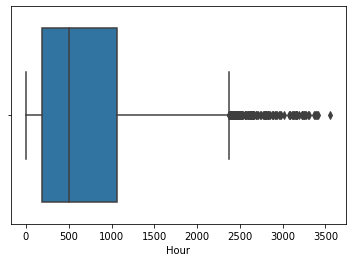

In [290]:
sns.boxplot(df['Hour'])

<AxesSubplot:xlabel='Rainfall(mm)'>

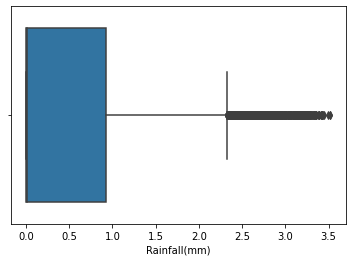

In [291]:
sns.boxplot(df['Rainfall(mm)'])


<AxesSubplot:xlabel='Snowfall (cm)'>

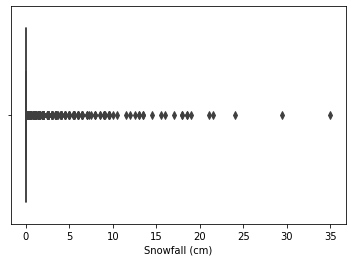

In [292]:
sns.boxplot(df['Snowfall (cm)'])

<AxesSubplot:xlabel='Solar Radiation (MJ/m2)'>

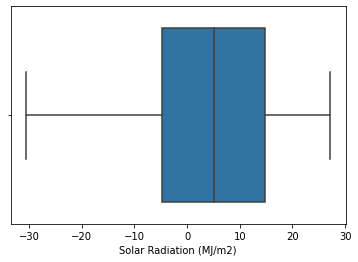

In [293]:
sns.boxplot(df['Solar Radiation (MJ/m2)'])

In [168]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'month', 'weekday'],
      dtype='object')

In [169]:
x=df.drop(['Date', 'Rented Bike Count','Seasons',
       'Holiday', 'Functioning Day'],axis=1)
y=df['Rented Bike Count']

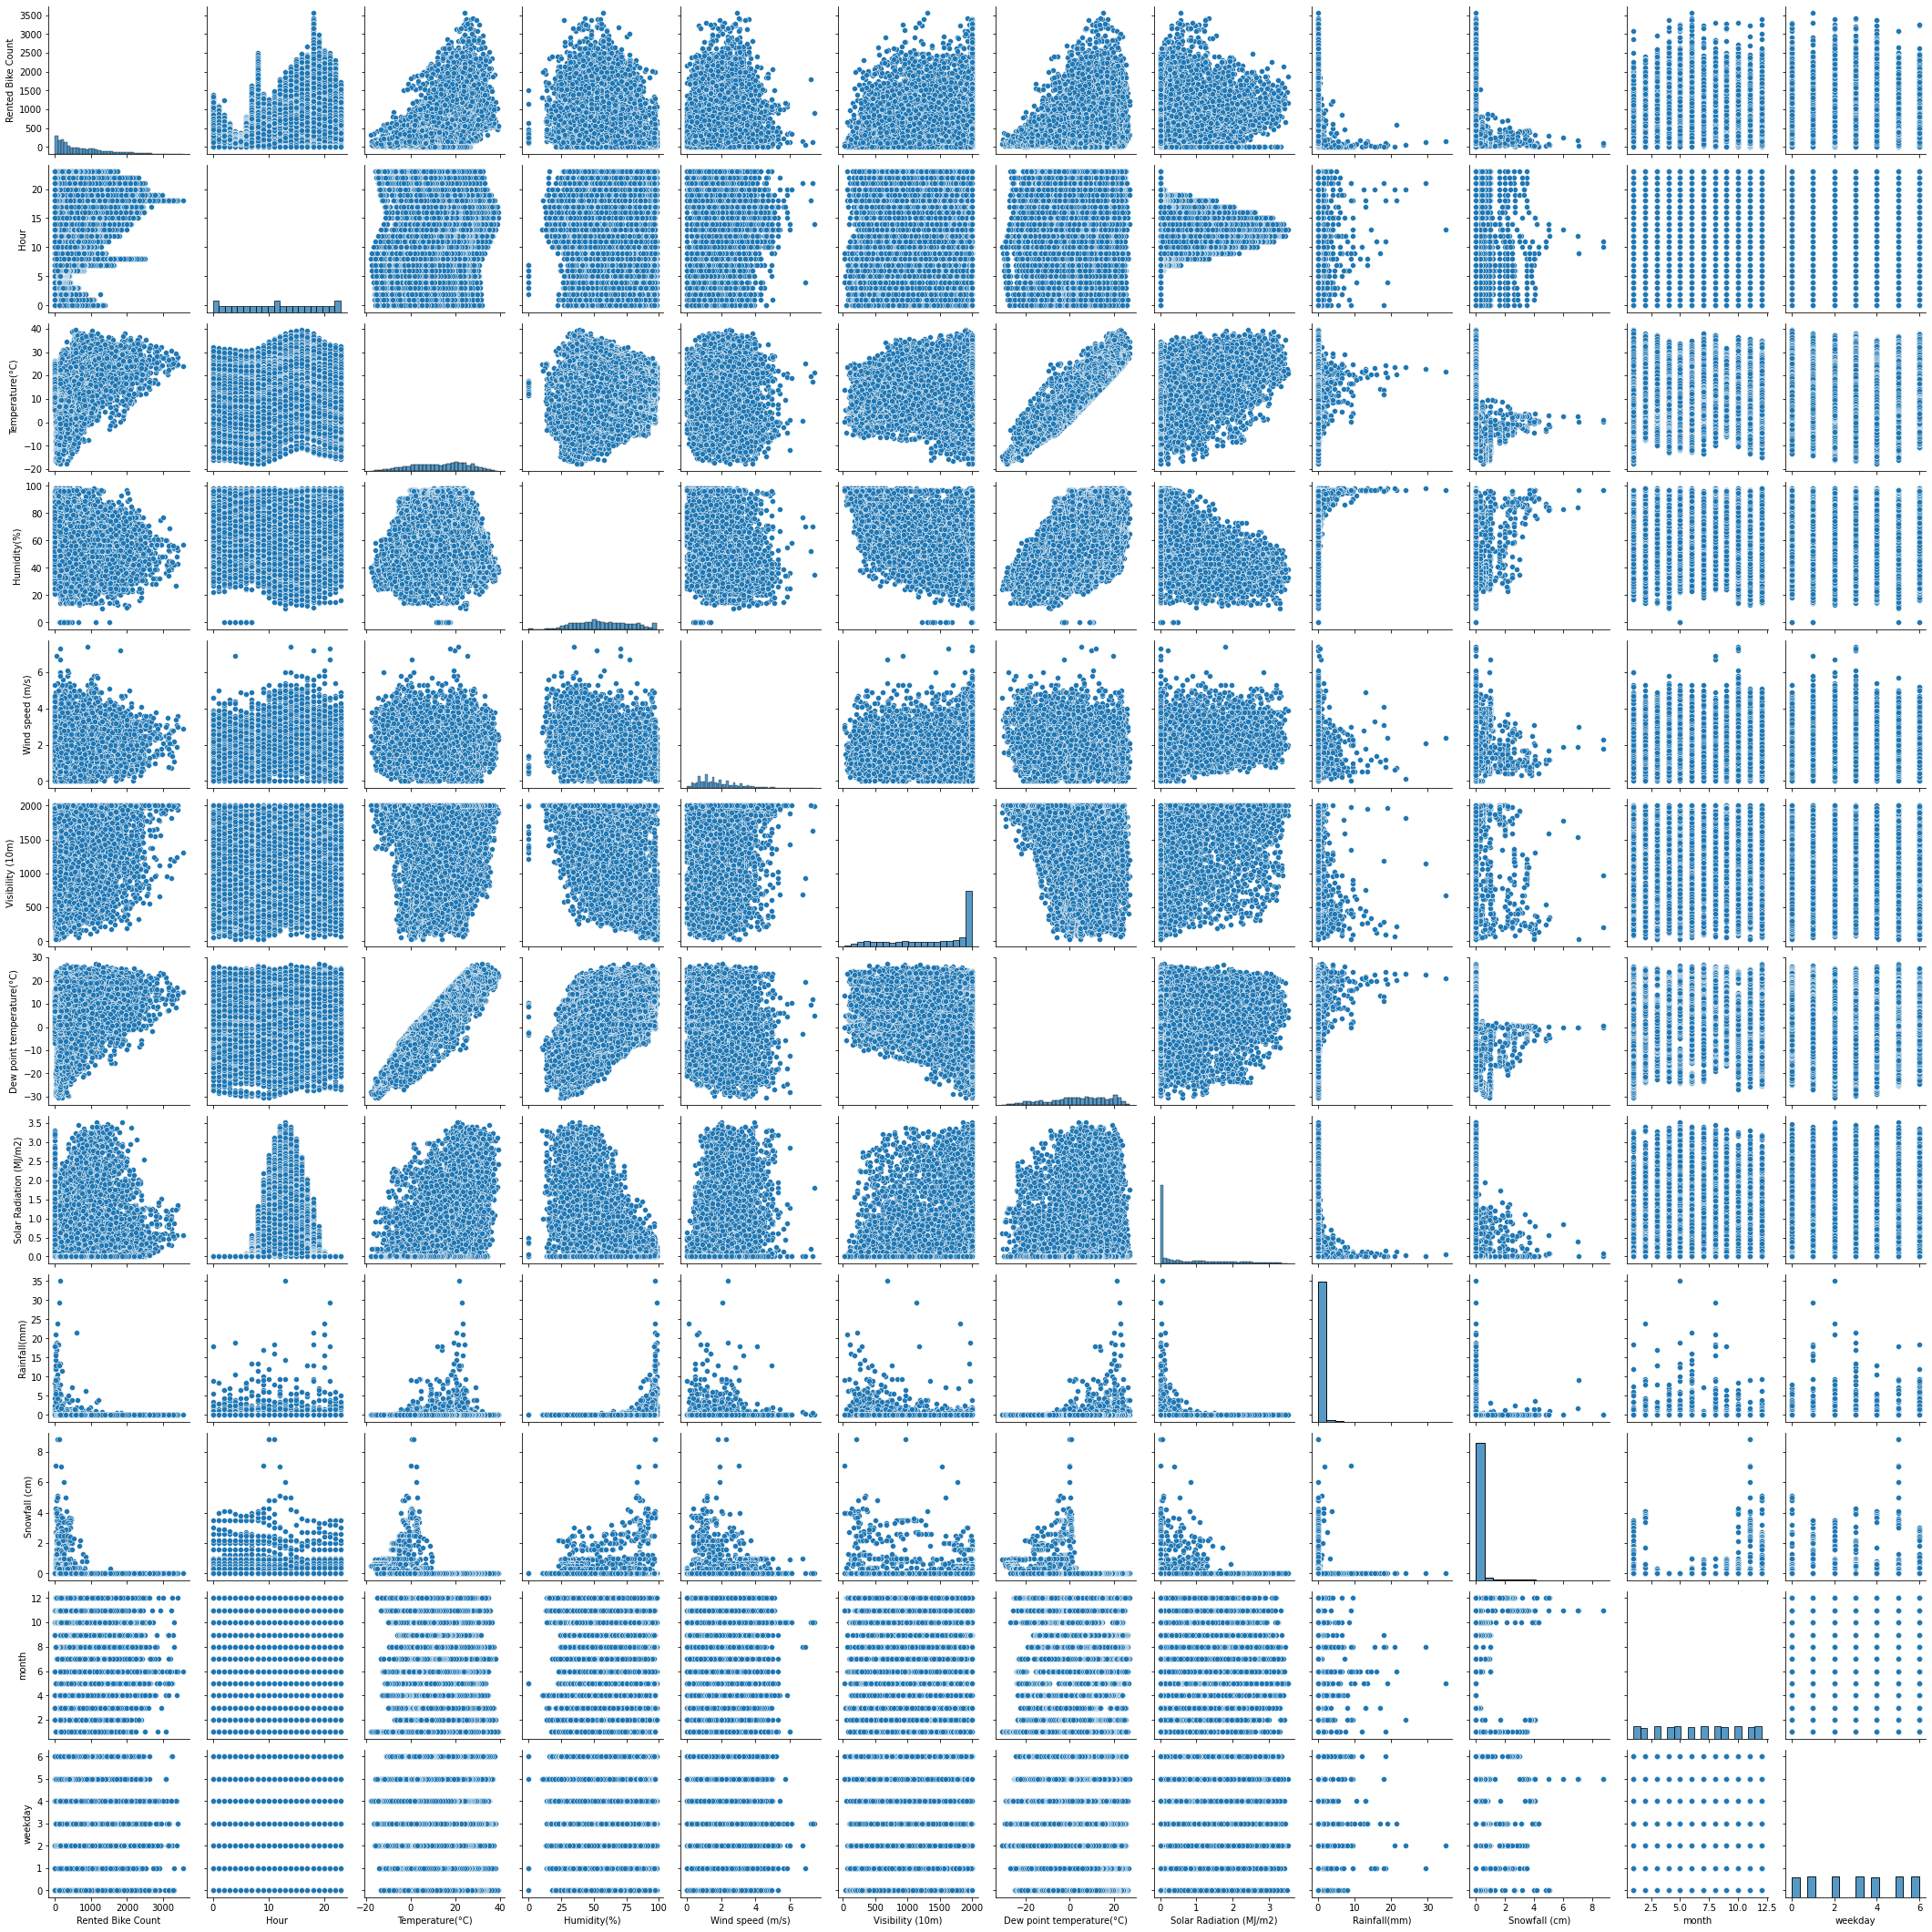

In [170]:
sns.pairplot(df)
plt.show()

<Figure size 1440x720 with 0 Axes>

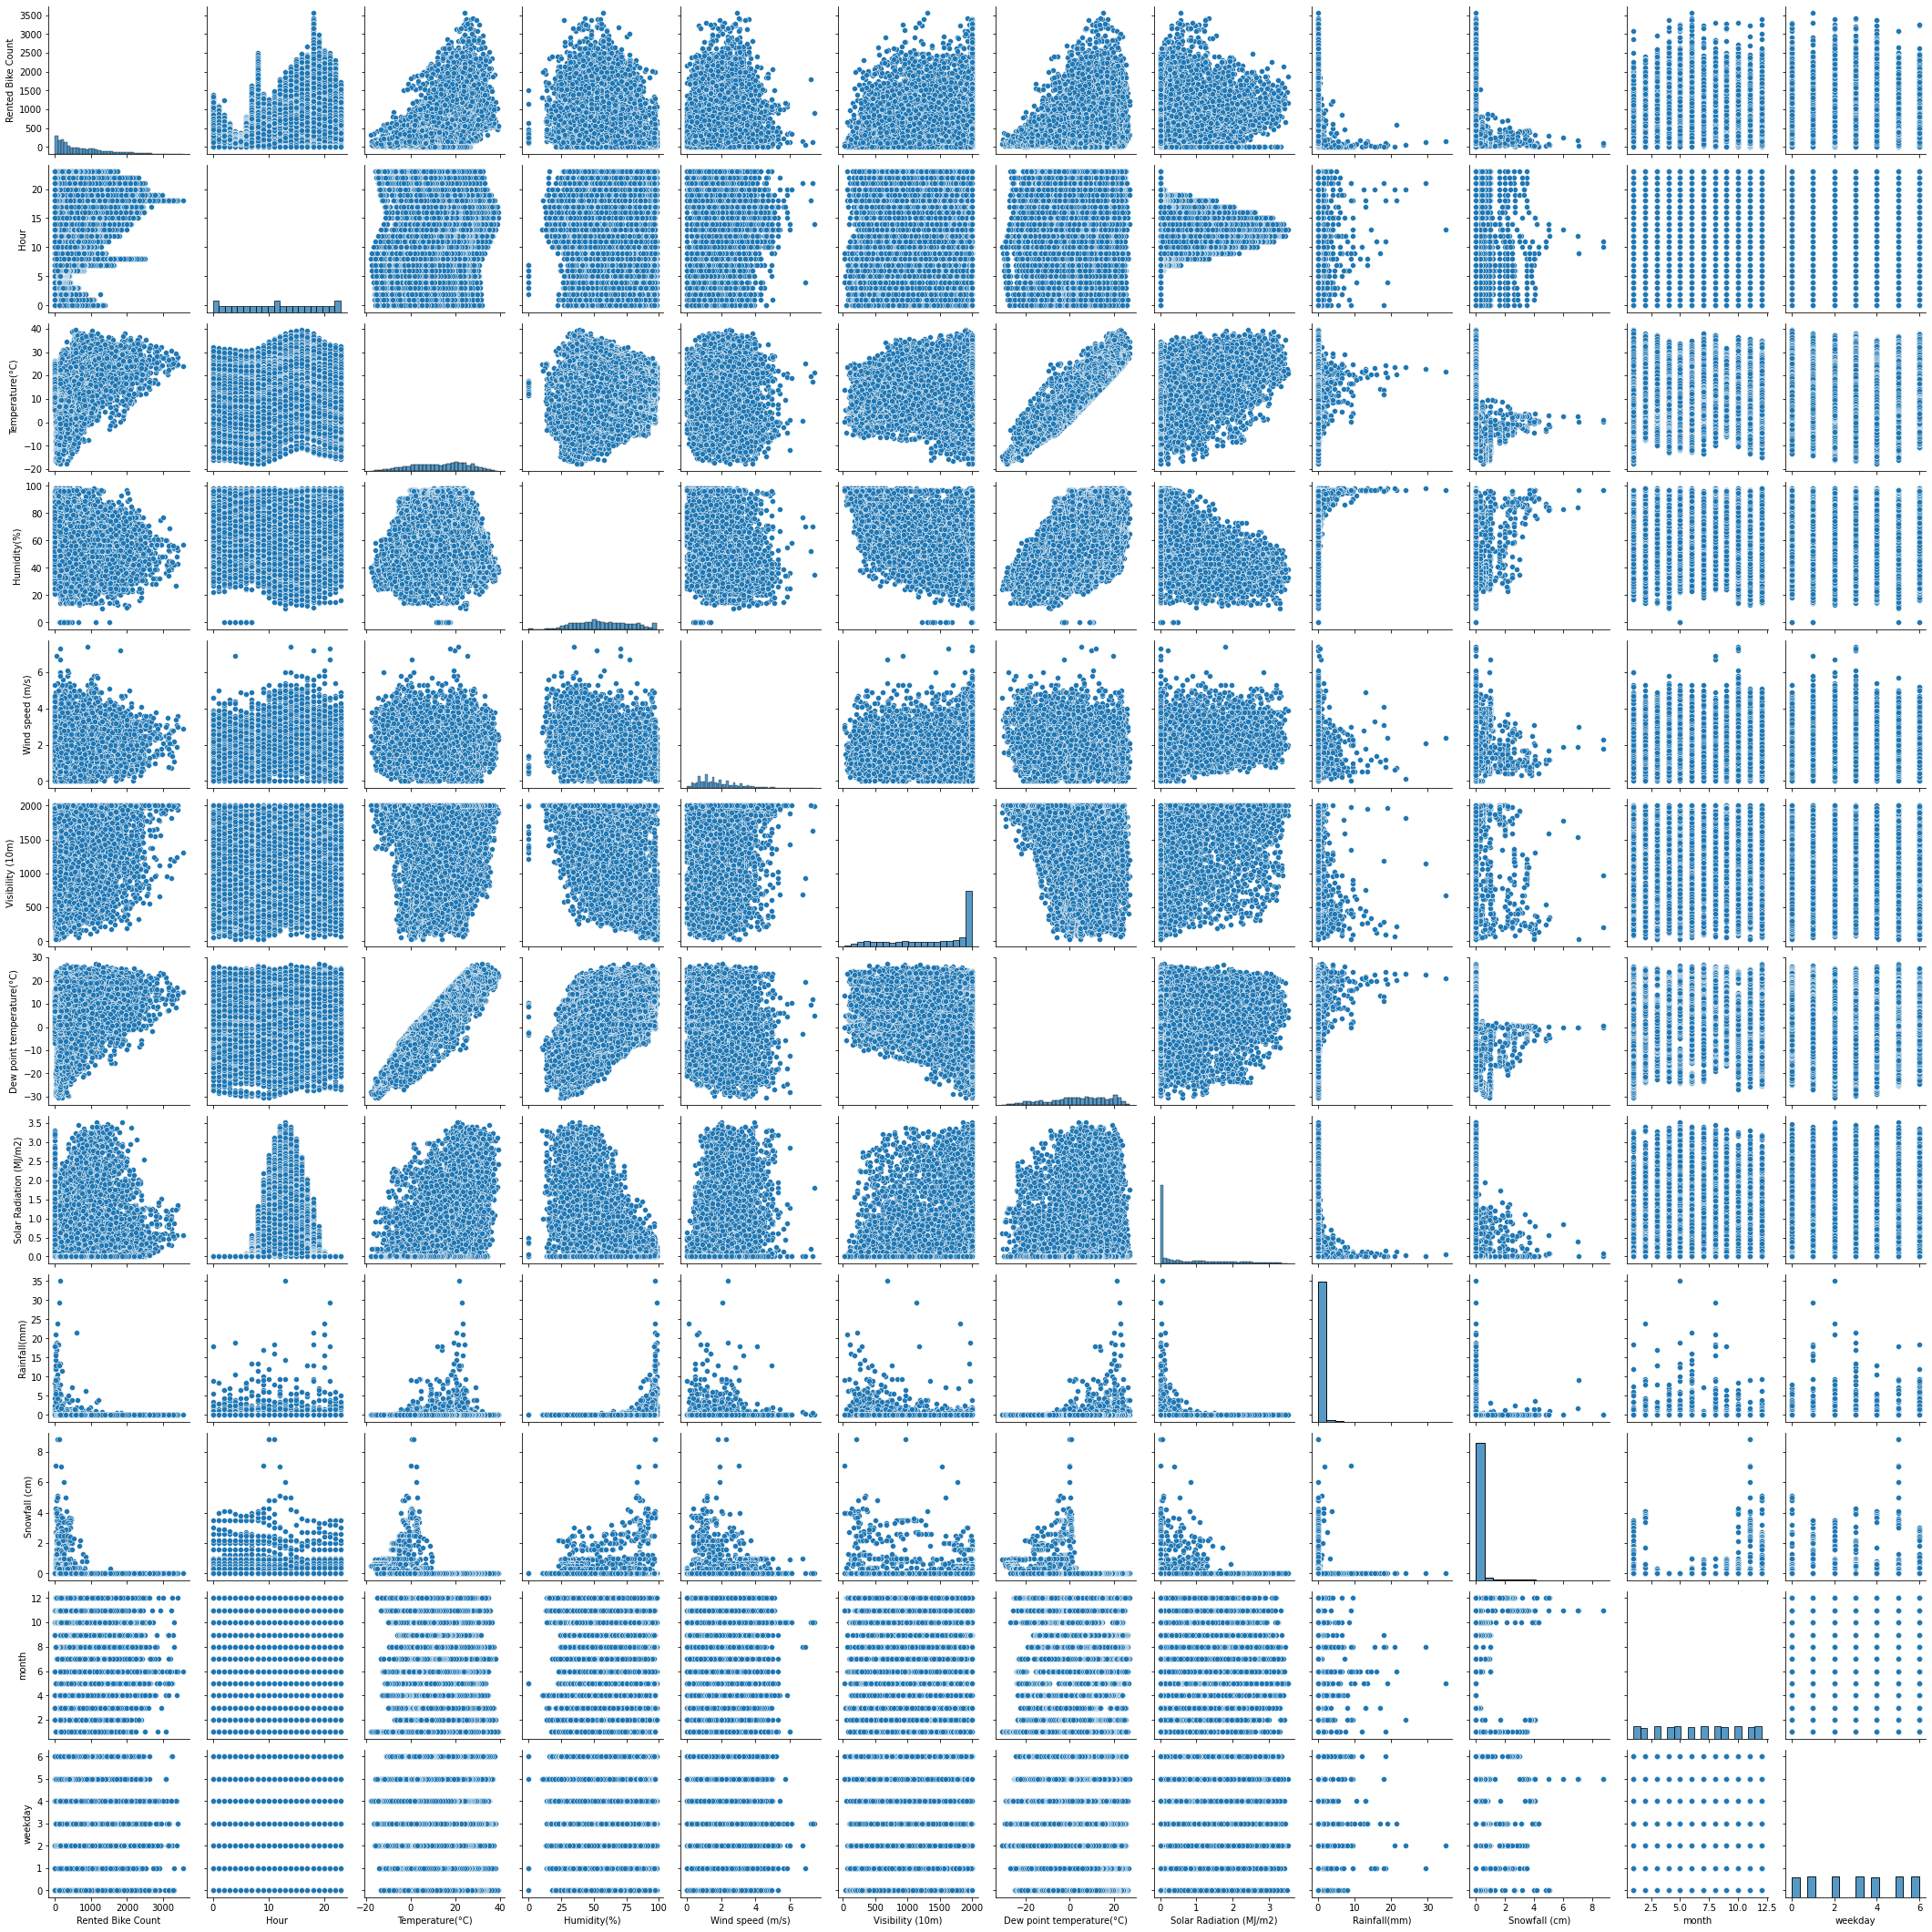

In [171]:
plt.figure(figsize=(20,10))
sns.pairplot(df,kind='scatter')

<AxesSubplot:xlabel='Hour', ylabel='Density'>

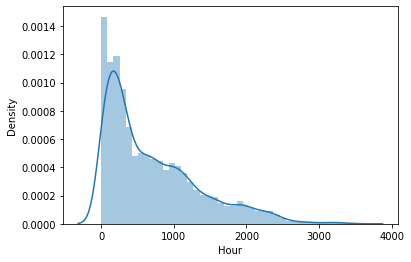

In [294]:
sns.distplot(df['Hour'])

<AxesSubplot:xlabel='Rainfall(mm)', ylabel='Density'>

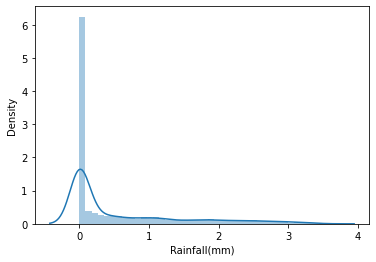

In [295]:
sns.distplot(df['Rainfall(mm)'])

In [174]:
df['Rainfall(mm)'].unique()

array([ 0. ,  0.5,  1. ,  2.5,  0.1,  0.2,  0.3,  0.7,  1.6,  0.4,  1.1,
        6.4,  9.5,  3.5,  0.9,  3.3,  1.4,  1.5,  3.7,  4.5,  9. ,  2. ,
        8. , 17. ,  7. ,  3. ,  1.9,  0.8,  4. ,  6. ,  5. ,  5.5,  2.4,
       35. , 19. , 13.5, 10. , 12.5, 11.5,  5.4, 10.5,  6.5, 16. , 14.5,
        4.9, 21.5, 12. , 18.5,  7.5, 24. ,  8.5,  7.3,  1.3, 15.5, 29.5,
       21. , 13. ,  1.2, 18. ,  9.1,  1.8])

In [175]:
# To check Normal Distribution of Rainfall(mm)

<AxesSubplot:xlabel='Rainfall(mm)', ylabel='Count'>

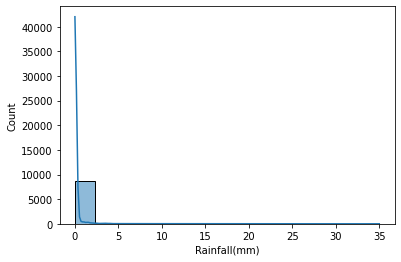

In [176]:
sns.histplot(df['Rainfall(mm)'],kde=True)

In [177]:
#for the next feature Temperature

<AxesSubplot:xlabel='Temperature(°C)', ylabel='Density'>

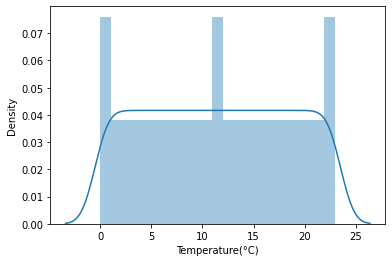

In [296]:
sns.distplot(df['Temperature(°C)'])

In [179]:
# I didnt have any idea about the temp of Seoul so its hard to judge the given data so i took a help of internet 
# and i observed that the given data is having low noise......

<AxesSubplot:xlabel='Humidity(%)', ylabel='Density'>

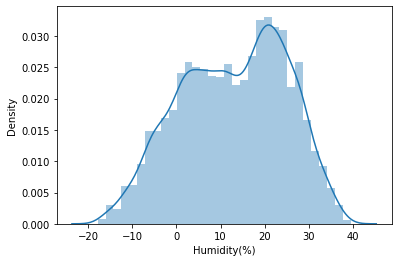

In [297]:
sns.distplot(df['Humidity(%)'])

In [181]:
# import numpy as np
# log_Hum= np.log(df['Humidity(%)'])
# # sns.distplot([log_Hum])
# log_Hum

In [182]:
# df.columns

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [184]:
#for Seasons column the datatype is of object

## Feature Engineering Technique= Encoding

In [185]:
df['Seasons'].unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [186]:
df['Seasons'].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [187]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [188]:
ONE=OneHotEncoder()
df1=pd.get_dummies(df['Seasons'],drop_first=True)
df1

Spring  Summer  Winter
0          0       0       1
1          0       0       1
2          0       0       1
3          0       0       1
4          0       0       1
...      ...     ...     ...
8755       0       0       0
8756       0       0       0
8757       0       0       0
8758       0       0       0
8759       0       0       0

[8760 rows x 3 columns]

In [189]:
df=pd.concat([df,df1],axis=1)

In [190]:
# For Holiday Column which is of object datatype

# Feature engineering = Replace

In [191]:
df['Holiday'].unique()

array(['No Holiday', 'Holiday'], dtype=object)

In [192]:
df['Holiday'].replace({'No Holiday':0, 'Holiday':1},inplace=True)

In [193]:
#for Functioning Day column the datatype is of object

In [194]:
df['Functioning Day'].unique()

array(['Yes', 'No'], dtype=object)

In [195]:
df['Functioning Day'].replace({'Yes':1, 'No':0},inplace=True)

In [196]:
df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0 2017-01-12                254     0             -5.2           37   
1 2017-01-12                204     1             -5.5           38   
2 2017-01-12                173     2             -6.0           39   
3 2017-01-12                107     3             -6.2           40   
4 2017-01-12                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  Holiday  \
0                      0.0           0.0            0.0  Winter        0   
1                      0.0           0.0            0.0  Winter        0   
2                      0.0           0.0            0.0  Winter        0   
3                      0.0           0.0            0.0  Winter        0   
4                      0.0           0.0            0.0  Winter        0   

   Functioning Day  month  weekday  Spring  Summer  Winter  
0                1      1        3       0       0       1  
1                1      1        3       0       0       1  
2                1      1        3       0       0       1  
3                1      1        3       0       0       1  
4                1      1        3       0       0       1

In [197]:
# df.drop(['Seasons'],axis=1,inplace=True)

In [198]:
df.drop(['Date'],axis=1,inplace=True)

In [199]:
df.head()

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   
2                173     2             -6.0           39               1.0   
3                107     3             -6.2           40               0.9   
4                 78     4             -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm) Seasons  Holiday  Functioning Day  month  \
0           0.0            0.0  Winter        0                1      1   
1           0.0            0.0  Winter        0                1      1   
2           0.0            0.0  Winter        0                1      1   
3           0.0            0.0  Winter        0                1      1   
4           0.0            0.0  Winter        0                1      1   

   weekday  Spring  Summer  Winter  
0        3       0       0       1  
1        3       0       0       1  
2        3       0       0       1  
3        3       0       0       1  
4        3       0       0       1

In [200]:
df.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'month', 'weekday', 'Spring', 'Summer',
       'Winter'],
      dtype='object')

In [201]:
df.drop('Seasons',axis=1,inplace=True)

In [202]:
df.columns=['Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Holiday',
       'Functioning Day', 'month', 'weekday', 'Spring', 'Summer', 'Winter','Rented Bike Count']

In [203]:
df.head()

Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
0   254                0         -5.2                37               2.2   
1   204                1         -5.5                38               0.8   
2   173                2         -6.0                39               1.0   
3   107                3         -6.2                40               0.9   
4    78                4         -6.0                36               2.3   

   Dew point temperature(°C)  Solar Radiation (MJ/m2)  Rainfall(mm)  \
0                       2000                    -17.6           0.0   
1                       2000                    -17.6           0.0   
2                       2000                    -17.7           0.0   
3                       2000                    -17.6           0.0   
4                       2000                    -18.6           0.0   

   Snowfall (cm)  Holiday  Functioning Day  month  weekday  Spring  Summer  \
0            0.0      0.0                0      1        1       3       0   
1            0.0      0.0                0      1        1       3       0   
2            0.0      0.0                0      1        1       3       0   
3            0.0      0.0                0      1        1       3       0   
4            0.0      0.0                0      1        1       3       0   

   Winter  Rented Bike Count  
0       0                  1  
1       0                  1  
2       0                  1  
3       0                  1  
4       0                  1

# Train Test Split 

In [204]:
x=df.drop(['Rented Bike Count'],axis=1)
y=df['Rented Bike Count']

In [205]:
from sklearn.model_selection import train_test_split

In [206]:
xtr,xte,ytr,yte = train_test_split(x,y,test_size=0.3,random_state=1)

In [207]:
xtr.shape

(6132, 16)

In [208]:
ytr.shape

(6132,)

In [209]:
xte.shape

(2628, 16)

In [210]:
yte.shape

(2628,)

# Model Training

In [211]:
from sklearn.linear_model import LinearRegression

In [212]:
linear_model= LinearRegression()
linear_model.fit(xtr,ytr)

LinearRegression()

# Evaluation

In [213]:
ypred=linear_model.predict(xte)
ypred

array([-0.12590723, -0.06286479,  0.00719669, ...,  1.07225148,
        0.26833666,  0.74873058])

In [303]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error,r2_score

In [215]:
mse=mean_squared_error(yte,ypred)
mse

0.04966440984745059

In [216]:
rmse=np.sqrt(mse)
rmse

0.22285513197467674

In [217]:
mae=mean_absolute_error(yte,ypred)
mae

0.17709639237108127

In [218]:
r2_score(yte,ypred)

0.7244879469702841

# Feature Selection Technique

In [219]:
df.corr()

Hour  Temperature(°C)  Humidity(%)  \
Hour                       1.000000     4.102573e-01     0.538558   
Temperature(°C)            0.410257     1.000000e+00     0.124114   
Humidity(%)                0.538558     1.241145e-01     1.000000   
Wind speed (m/s)          -0.199780    -2.416438e-01     0.159371   
Visibility (10m)           0.121108     2.851967e-01    -0.036252   
Dew point temperature(°C)  0.199280     9.875348e-02     0.034794   
Solar Radiation (MJ/m2)    0.379788     3.054372e-03     0.912798   
Rainfall(mm)               0.261837     1.451309e-01     0.353505   
Snowfall (cm)             -0.123074     8.714642e-03     0.050282   
Holiday                   -0.141804    -2.151645e-02    -0.218405   
Functioning Day           -0.072338    -1.391486e-16    -0.055931   
month                      0.203943     5.439377e-03    -0.050170   
weekday                    0.070861     1.036729e-15     0.049683   
Spring                    -0.021577     8.730219e-18    -0.004117   
Summer                     0.022888    -1.159917e-15     0.007960   
Winter                     0.296549     8.578102e-16     0.665846   
Rented Bike Count         -0.424925    -1.697335e-15    -0.738720   

                           Wind speed (m/s)  Visibility (10m)  \
Hour                              -0.199780          0.121108   
Temperature(°C)                   -0.241644          0.285197   
Humidity(%)                        0.159371         -0.036252   
Wind speed (m/s)                   1.000000         -0.336683   
Visibility (10m)                  -0.336683          1.000000   
Dew point temperature(°C)         -0.543090          0.171507   
Solar Radiation (MJ/m2)            0.536894         -0.176486   
Rainfall(mm)                      -0.461919          0.332274   
Snowfall (cm)                      0.236397         -0.019674   
Holiday                            0.108183         -0.003554   
Functioning Day                   -0.050278          0.023017   
month                             -0.020800          0.005037   
weekday                            0.047798         -0.082069   
Spring                            -0.019617         -0.031634   
Summer                             0.015694          0.083855   
Winter                             0.192595         -0.064698   
Rented Bike Count                 -0.238295          0.109186   

                           Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
Hour                                        0.199280                 0.379788   
Temperature(°C)                             0.098753                 0.003054   
Humidity(%)                                 0.034794                 0.912798   
Wind speed (m/s)                           -0.543090                 0.536894   
Visibility (10m)                            0.171507                -0.176486   
Dew point temperature(°C)                   1.000000                -0.176630   
Solar Radiation (MJ/m2)                    -0.176630                 1.000000   
Rainfall(mm)                                0.149738                 0.094381   
Snowfall (cm)                              -0.167629                 0.125597   
Holiday                                    -0.121695                -0.150887   
Functioning Day                             0.031773                -0.066759   
month                                      -0.026000                -0.052837   
weekday                                     0.077888                 0.065101   
Spring                                      0.029870                -0.016020   
Summer                                     -0.187498                 0.002056   
Winter                                      0.061958                 0.652378   
Rented Bike Count                           0.008616                -0.722366   

                           Rainfall(mm)  Snowfall (cm)   Holiday  \
Hour                           0.261837      -0.123074 -0.141804   
Temperature(°C)       

<AxesSubplot:>

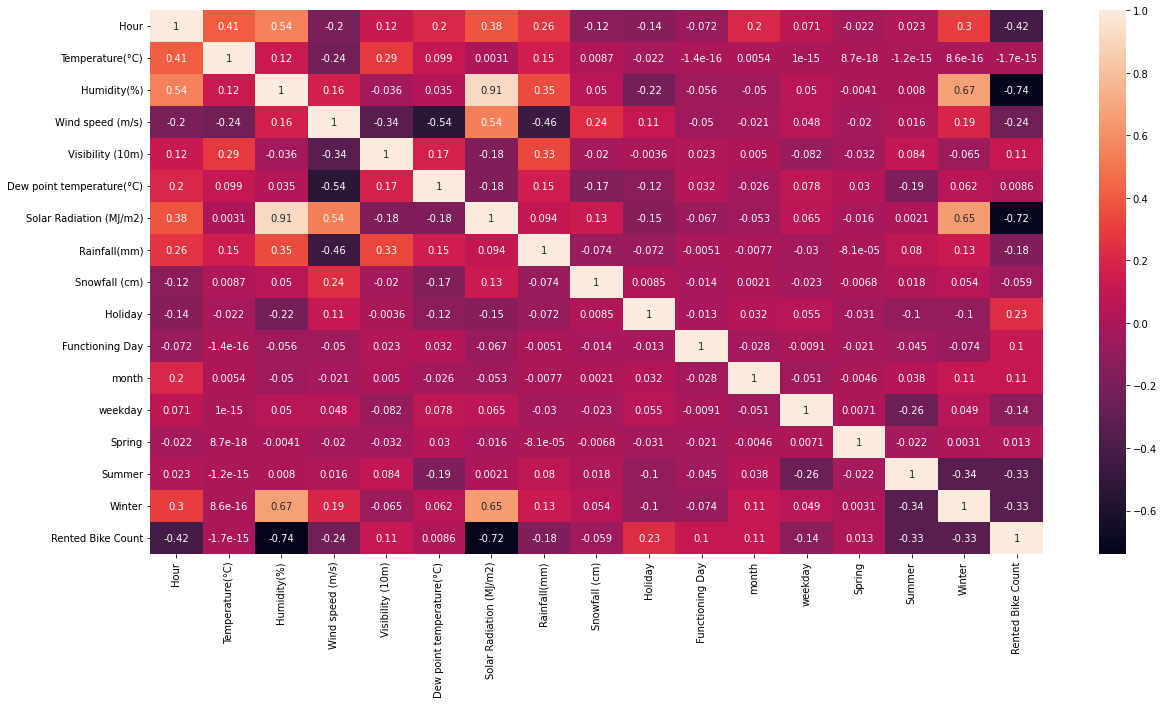

In [220]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

In [ ]:
# from this heatmap I came to know some features are correlated with each other 
# which violates basic assumptions of linear regression where as rest are highly correlated with Target Variable.

In [221]:
#checking on Training Data also

In [222]:
ypred=linear_model.predict(xtr)
ypred

array([ 0.13854351, -0.06103368, -0.02414751, ...,  0.68130453,
       -0.01229372,  0.62729984])

In [223]:
mse=mean_squared_error(ytr,ypred)
mse

0.047728574916628734

In [224]:
mae=mean_absolute_error(ytr,ypred)
mae

0.17490017275898478

In [225]:
rmse=np.sqrt(mse)
rmse

0.21846870466185478

In [226]:
r2_score(ytr,ypred)

0.7462183834172471

In [227]:
# R2 score of training data is 0.7461 and for testing data is 0.7247... there is no such big difference in both the accuracies.

In [228]:
df.corr()['Rented Bike Count']

Hour                        -4.249251e-01
Temperature(°C)             -1.697335e-15
Humidity(%)                 -7.387196e-01
Wind speed (m/s)            -2.382952e-01
Visibility (10m)             1.091865e-01
Dew point temperature(°C)    8.616224e-03
Solar Radiation (MJ/m2)     -7.223664e-01
Rainfall(mm)                -1.784202e-01
Snowfall (cm)               -5.875456e-02
Holiday                      2.258745e-01
Functioning Day              1.045574e-01
month                        1.067954e-01
weekday                     -1.370569e-01
Spring                       1.280068e-02
Summer                      -3.320989e-01
Winter                      -3.320989e-01
Rented Bike Count            1.000000e+00
Name: Rented Bike Count, dtype: float64

In [229]:
df.corr()['Humidity(%)']

Hour                         0.538558
Temperature(°C)              0.124114
Humidity(%)                  1.000000
Wind speed (m/s)             0.159371
Visibility (10m)            -0.036252
Dew point temperature(°C)    0.034794
Solar Radiation (MJ/m2)      0.912798
Rainfall(mm)                 0.353505
Snowfall (cm)                0.050282
Holiday                     -0.218405
Functioning Day             -0.055931
month                       -0.050170
weekday                      0.049683
Spring                      -0.004117
Summer                       0.007960
Winter                       0.665846
Rented Bike Count           -0.738720
Name: Humidity(%), dtype: float64

In [ ]:
# I observed Humidity and Solar radiation features are highly corelated with each other and 
# they violating the basic assumptions(No Multicollinearity) of linear regression model.
# so i decided to drop that features....

In [230]:
df1=df.drop(['Humidity(%)','Solar Radiation (MJ/m2)'],axis=1)

In [231]:
df1.head()

Hour  Temperature(°C)  Wind speed (m/s)  Visibility (10m)  \
0   254                0                37               2.2   
1   204                1                38               0.8   
2   173                2                39               1.0   
3   107                3                40               0.9   
4    78                4                36               2.3   

   Dew point temperature(°C)  Rainfall(mm)  Snowfall (cm)  Holiday  \
0                       2000           0.0            0.0      0.0   
1                       2000           0.0            0.0      0.0   
2                       2000           0.0            0.0      0.0   
3                       2000           0.0            0.0      0.0   
4                       2000           0.0            0.0      0.0   

   Functioning Day  month  weekday  Spring  Summer  Winter  Rented Bike Count  
0                0      1        1       3       0       0                  1  
1                0      1        1       3       0       0                  1  
2                0      1        1       3       0       0                  1  
3                0      1        1       3       0       0                  1  
4                0      1        1       3       0       0                  1

In [232]:
x=df1.drop(['Rented Bike Count'],axis=1)
y=df1['Rented Bike Count']

In [233]:
xtr,xte,ytr,yte = train_test_split(x,y,test_size=0.25,random_state=1)

In [234]:
linear_model= LinearRegression()
linear_model.fit(xtr,ytr)

LinearRegression()

In [235]:
ypred=linear_model.predict(xte)
ypred

array([-0.12327099,  0.10404843, -0.05066216, ...,  0.49547275,
       -0.29296988,  0.48378605])

In [236]:
ypred=linear_model.predict(xtr)
ypred

array([ 0.58757703, -0.03240607,  0.06641434, ...,  0.71978075,
       -0.24903216,  0.67106102])

In [237]:
r2_score(ytr,ypred)

0.6258315457275025

### Basic assumptions of Linear Regression Algorithm:

In [ ]:
# 1. Linearity  >>> R-value >>> coefficient of correlation >> range (-1 to +1)
# 2. Independance >>> No collinear reln between independent variable.
# 3. No Multicollinearity 
# 4. Normality of Residuals 
# 5. Homoscadisticity of Variance

In [ ]:
There are some important concepts involved in Linear Regression algorithm like,
  1.Gradient Descent Algorithm:
  2.Best Fit Line
  3.Different evaluation parameters like SSE, SSR, SST and mae, mse, mape, r2 score
  4.new term introduced i.e. adjusted r2_score (which have a more significance wrt new 'non-significant' features)
  5.we used R2_score as a evaluation parameter instead of mae and mse because they are scale varient 
    where as former is scale invarient.

In [ ]:
##################################### END #####################################################################################

# 2- K_Nearest_Neighbour_Algorithm

In [276]:
from sklearn.neighbors import KNeighborsRegressor

In [287]:
df.head()

Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
0   254                0         -5.2                37               2.2   
1   204                1         -5.5                38               0.8   
2   173                2         -6.0                39               1.0   
3   107                3         -6.2                40               0.9   
4    78                4         -6.0                36               2.3   

   Dew point temperature(°C)  Solar Radiation (MJ/m2)  Rainfall(mm)  \
0                       2000                    -17.6           0.0   
1                       2000                    -17.6           0.0   
2                       2000                    -17.7           0.0   
3                       2000                    -17.6           0.0   
4                       2000                    -18.6           0.0   

   Snowfall (cm)  Holiday  Functioning Day  month  weekday  Spring  Summer  \
0            0.0      0.0                0      1        1       3       0   
1            0.0      0.0                0      1        1       3       0   
2            0.0      0.0                0      1        1       3       0   
3            0.0      0.0                0      1        1       3       0   
4            0.0      0.0                0      1        1       3       0   

   Winter  Rented Bike Count  
0       0                  1  
1       0                  1  
2       0                  1  
3       0                  1  
4       0                  1

In [263]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Hour                       8760 non-null   int64  
 1   Temperature(°C)            8760 non-null   int64  
 2   Humidity(%)                8760 non-null   float64
 3   Wind speed (m/s)           8760 non-null   int64  
 4   Visibility (10m)           8760 non-null   float64
 5   Dew point temperature(°C)  8760 non-null   int64  
 6   Solar Radiation (MJ/m2)    8760 non-null   float64
 7   Rainfall(mm)               8760 non-null   float64
 8   Snowfall (cm)              8760 non-null   float64
 9   Holiday                    8760 non-null   float64
 10  Functioning Day            8760 non-null   int64  
 11  month                      8760 non-null   int64  
 12  weekday                    8760 non-null   int64  
 13  Spring                     8760 non-null   int64

In [264]:
df.describe()

Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
count  8760.000000      8760.000000  8760.000000       8760.000000   
mean    704.602055        11.500000    12.882922         58.226256   
std     644.997468         6.922582    11.944825         20.362413   
min       0.000000         0.000000   -17.800000          0.000000   
25%     191.000000         5.750000     3.500000         42.000000   
50%     504.500000        11.500000    13.700000         57.000000   
75%    1065.250000        17.250000    22.500000         74.000000   
max    3556.000000        23.000000    39.400000         98.000000   

       Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
count       8760.000000                8760.000000              8760.000000   
mean           1.724909                1436.825799                 4.073813   
std            1.036300                 608.298712                13.060369   
min            0.000000                  27.000000               -30.600000   
25%            0.900000                 940.000000                -4.700000   
50%            1.500000                1698.000000                 5.100000   
75%            2.300000                2000.000000                14.800000   
max            7.400000                2000.000000                27.200000   

       Rainfall(mm)  Snowfall (cm)      Holiday  Functioning Day        month  \
count   8760.000000    8760.000000  8760.000000      8760.000000  8760.000000   
mean       0.569111       0.148687     0.075068         0.049315     0.966324   
std        0.868746       1.128193     0.436746         0.216537     0.180404   
min        0.000000       0.000000     0.000000         0.000000     0.000000   
25%        0.000000       0.000000     0.000000         0.000000     1.000000   
50%        0.010000       0.000000     0.000000         0.000000     1.000000   
75%        0.930000       0.000000     0.000000         0.000000     1.000000   
max        3.520000      35.000000     8.800000         1.000000     1.000000   

           weekday       Spring       Summer       Winter  Rented Bike Count  
count  8760.000000  8760.000000  8760.000000  8760.000000        8760.000000  
mean      6.526027     3.021918     0.252055     0.252055           0.246575  
std       3.448048     1.999994     0.434217     0.434217           0.431042  
min       1.000000     0.000000     0.000000     0.000000           0.000000  
25%       4.000000     1.000000     0.000000     0.000000           0.000000  
50%       7.000000     3.000000     0.000000     0.000000           0.000000  
75%      10.000000     5.000000     1.000000     1.000000           0.000000  
max      12.000000     6.000000     1.000000     1.000000           1.000000

# feature Engineering Technique= scaling

In [272]:
from sklearn.preprocessing import StandardScaler

In [265]:
from scipy.stats import normaltest

In [269]:
status,p_val = normaltest(df['Humidity(%)'])
p_val
print("p value is ",p_val)
if p_val > 0.05:
    print("Data is normally distribted")
    
else:
    print('Data is not normally distributed')

p value is  9.293047130692857e-206
Data is not normally distributed


In [271]:
x=df.drop('Rented Bike Count',axis=1)
y=df['Rented Bike Count']

In [273]:
std_scaler = StandardScaler()
x_scaled = std_scaler.fit_transform(x)
x_std_df = pd.DataFrame(x_scaled,columns=x.columns)
x_std_df

Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0    -0.698650        -1.661325    -1.513957         -1.042483   
1    -0.776175        -1.516862    -1.539074         -0.993370   
2    -0.824240        -1.372399    -1.580936         -0.944257   
3    -0.926571        -1.227936    -1.597680         -0.895144   
4    -0.971535        -1.083473    -1.580936         -1.091596   
...        ...              ...          ...               ...   
8755  0.462661         1.083473    -0.726961         -1.189822   
8756  0.092095         1.227936    -0.793939         -1.042483   
8757 -0.016438         1.372399    -0.860918         -0.944257   
8758  0.011470         1.516862    -0.902779         -0.846031   
8759 -0.186991         1.661325    -0.919524         -0.747806   

      Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0             0.458476                   0.925871                -1.659605   
1            -0.892561                   0.925871                -1.659605   
2            -0.699556                   0.925871                -1.667262   
3            -0.796059                   0.925871                -1.659605   
4             0.554978                   0.925871                -1.736177   
...                ...                        ...                      ...   
8755          0.844486                   0.751605                -1.100630   
8756          0.554978                   0.925871                -1.070001   
8757         -1.375075                   0.873263                -1.070001   
8758         -0.699556                   0.694064                -1.062344   
8759         -0.410048                   0.776265                -1.024058   

      Rainfall(mm)  Snowfall (cm)   Holiday  Functioning Day    month  \
0        -0.655132        -0.1318 -0.171891        -0.227757  0.18668   
1        -0.655132        -0.1318 -0.171891        -0.227757  0.18668   
2        -0.655132        -0.1318 -0.171891        -0.227757  0.18668   
3        -0.655132        -0.1318 -0.171891        -0.227757  0.18668   
4        -0.655132        -0.1318 -0.171891        -0.227757  0.18668   
...            ...            ...       ...              ...      ...   
8755     -0.655132        -0.1318 -0.171891        -0.227757  0.18668   
8756     -0.655132        -0.1318 -0.171891        -0.227757  0.18668   
8757     -0.655132        -0.1318 -0.171891        -0.227757  0.18668   
8758     -0.655132        -0.1318 -0.171891        -0.227757  0.18668   
8759     -0.655132        -0.1318 -0.171891        -0.227757  0.18668   

       weekday   Spring    Summer    Winter  
0    -1.602745 -0.01096 -0.580514 -0.580514  
1    -1.602745 -0.01096 -0.580514 -0.580514  
2    -1.602745 -0.01096 -0.580514 -0.580514  
3    -1.602745 -0.01096 -0.580514 -0.580514  
4    -1.602745 -0.01096 -0.580514 -0.580514  
...        ...      ...       ...       ...  
8755  1.297612  0.48907 -0.580514 -0.580514  
8756  1.297612  0.48907 -0.580514 -0.580514  
8757  1.297612  0.48907 -0.580514 -0.580514  
8758  1.297612  0.48907 -0.580514 -0.580514  
8759  1.297612  0.48907 -0.580514 -0.580514  

[8760 rows x 16 columns]

# Train Test Split

In [275]:
xtr,xte,ytr,yte=train_test_split(x_std_df,y,test_size=0.3,random_state=1)

In [277]:
knn_model=KNeighborsRegressor()
knn_model.fit(xtr,ytr)

KNeighborsRegressor()

In [278]:
y_pred=knn_model.predict(xte)
y_pred

array([0., 0., 0., ..., 1., 0., 1.])

# Evaluation

In [304]:
score=knn_model.score(xte,yte)
r2_score=r2_score(yte,y_pred)
mse=mean_squared_error(yte,y_pred)
rmse=np.sqrt(mse)

print("Model score is:",score)
print("R2 score is:",r2_score)
print("Mean Squared Error is:",mse)
print("Root Mean Squared Erroris:",rmse)

Model score is: 0.9753445572548516
R2 score is: 0.9753445572548516
Mean Squared Error is: 0.004444444444444445
Root Mean Squared Erroris: 0.06666666666666668


### Some basics abourt KNN algorithm

In [ ]:
1. It is a distance Based Algorithm
2. No assumptions are required on Data AKA 'non-parametric algorithm'
3. It is a lazy learner algorithm
4. Mostly' Feature scaling' is required due to distance based algo
5. Hyperparameter can be done, Parameters are'K= n_neighbors' and 'p-value= 1 or 2'
6. sensitive to imbalanced dataset
7. sensitive to outliers
8. It is not used for High Dimentional Data.

### Mathematical Intution behind KNN algorithm

In [ ]:
1.select the value of 'K'
2.finds the distance between new point to all training data point
3.it selects nearest K_neighbors
4.it takes mean/average of K_neighbors

when this algorithm use for classification problems it takes majority voting by voting classifiers.

In [ ]:
############################## END #####################################################################################

# 3- Random_Forest_Algorithm

In [146]:
from sklearn.ensemble import RandomForestRegressor

In [286]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Hour                       8760 non-null   int64  
 1   Temperature(°C)            8760 non-null   int64  
 2   Humidity(%)                8760 non-null   float64
 3   Wind speed (m/s)           8760 non-null   int64  
 4   Visibility (10m)           8760 non-null   float64
 5   Dew point temperature(°C)  8760 non-null   int64  
 6   Solar Radiation (MJ/m2)    8760 non-null   float64
 7   Rainfall(mm)               8760 non-null   float64
 8   Snowfall (cm)              8760 non-null   float64
 9   Holiday                    8760 non-null   float64
 10  Functioning Day            8760 non-null   int64  
 11  month                      8760 non-null   int64  
 12  weekday                    8760 non-null   int64  
 13  Spring                     8760 non-null   int64

In [285]:
df.head()

Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
0   254                0         -5.2                37               2.2   
1   204                1         -5.5                38               0.8   
2   173                2         -6.0                39               1.0   
3   107                3         -6.2                40               0.9   
4    78                4         -6.0                36               2.3   

   Dew point temperature(°C)  Solar Radiation (MJ/m2)  Rainfall(mm)  \
0                       2000                    -17.6           0.0   
1                       2000                    -17.6           0.0   
2                       2000                    -17.7           0.0   
3                       2000                    -17.6           0.0   
4                       2000                    -18.6           0.0   

   Snowfall (cm)  Holiday  Functioning Day  month  weekday  Spring  Summer  \
0            0.0      0.0                0      1        1       3       0   
1            0.0      0.0                0      1        1       3       0   
2            0.0      0.0                0      1        1       3       0   
3            0.0      0.0                0      1        1       3       0   
4            0.0      0.0                0      1        1       3       0   

   Winter  Rented Bike Count  
0       0                  1  
1       0                  1  
2       0                  1  
3       0                  1  
4       0                  1

# Train Test Split the data

In [240]:
x=df.drop('Rented Bike Count',axis=1)
y=df['Rented Bike Count']

In [241]:
xtr,xte,ytr,yte=train_test_split(x,y,test_size=0.3,random_state=1)

In [242]:
rfr= RandomForestRegressor(random_state=1)
rfr

RandomForestRegressor(random_state=1)

In [243]:
rfr.fit(xtr,ytr)

RandomForestRegressor(random_state=1)

In [244]:
ypred=rfr.predict(xte)
ypred

array([0.  , 0.  , 0.  , ..., 0.98, 0.  , 1.  ])

In [246]:
ypred_tr=rfr.predict(xtr)
ypred_tr

array([0.  , 0.  , 0.  , ..., 0.95, 0.  , 0.86])

# Evaluation

In [247]:
mse=mean_squared_error(yte,ypred)
mse

0.004084779299847793

In [248]:
mae=mean_absolute_error(yte,ypred)
mae

0.010662100456621006

In [250]:
rmse=np.sqrt(mse)
rmse

0.06391227816192904

In [251]:
r2_score(yte,ypred)

0.9773397905153579

In [252]:
r2_score(ytr,ypred_tr)

0.9976003302185619

In [ ]:
# here i observed r2_score is 0.97 and 0.99 for testing and traning respectively,
# so i decided to go for the Hyperparameter tuning and tried with GridsearchCV......

In [253]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [256]:
import warnings
warnings.filterwarnings('ignore')

In [305]:
# %%time
# hyp = { 'n_estimators' : np.arange(10,50), 
#         'criterion' : ['mse','mae'],
#         'min_samples_split': np.arange(2,10),
#         'min_samples_leaf' : np.arange(1,10),
#         'max_depth' : np.arange(2,10)}

# gscv_rfr= GridSearchCV(rfr,hyp, cv = 5)
# gscv_rfr.fit(xtr,ytr)


### some basics about Random_Forest_Algorithm

In [ ]:
1. Ensemble Technique >>> Parallel approch follows
2. Bagging >>> Bootstraping + Aggregation
3. RF >>> collection of Decision Trees 
4. overcome the problem of 'Overfitting' occured in DT
5. stability arises because result is based on 'averaging'

when it is used for classification it uses majority voting classifier.

In [ ]:
########################################## END #########################################################################

In [306]:
import pickle
pickle.dump(knn_model,open('Knn_model.pkl','wb'))